In [3]:
## Open Oceanic data
import numpy as np
ocean_pwr_na = []
ocean_pwr_np = []
ocean_pwr_sa = []
ocean_pwr_sp = []
dates_ocean_pwr = []
for i in range(2010, 2020):
    print(i)
    try:
        SNRO = np.load('SNR_%d.npz'%i, allow_pickle=True)
    except:
        raise
        continue
    date_snr = SNRO['date'] # dates of oceanic data
    snr_na = SNRO['snr_NA'] # SNR in the North Atlantic
    snr_np = SNRO['snr_NP'] # SNR in the North Pacific
    snr_sa = SNRO['snr_SA'] # SNR in the South Atlantic
    snr_sp = SNRO['snr_SP'] # SNR in the South Pacific

    ocean_pwr_na.append(snr_na)
    ocean_pwr_np.append(snr_np)
    ocean_pwr_sa.append(snr_sa)
    ocean_pwr_sp.append(snr_sp)
    dates_ocean_pwr.append(date_snr)

# North Atlantic
ocean_pwr_na = np.stack(ocean_pwr_na, axis = 0)
ocean_pwr_na = ocean_pwr_na.flatten()
index = np.argwhere(ocean_pwr_na != 0.0)
ocean_pwr_na = ocean_pwr_na[index]

# Dates
dates_ocean_pwr = np.stack(dates_ocean_pwr, axis=0)
dates_ocean_pwr = dates_ocean_pwr.flatten()
dates_ocean_pwr = dates_ocean_pwr[index]

# North Pacific
ocean_pwr_np = np.stack(ocean_pwr_np, axis = 0)
ocean_pwr_np = ocean_pwr_np.flatten()
ocean_pwr_np = ocean_pwr_np[index]

# South Atlantic
ocean_pwr_sa = np.stack(ocean_pwr_sa, axis = 0)
ocean_pwr_sa = ocean_pwr_sa.flatten()
ocean_pwr_sa = ocean_pwr_sa[index]

# South Pacific
ocean_pwr_sp = np.stack(ocean_pwr_sp, axis = 0)
ocean_pwr_sp = ocean_pwr_sp.flatten()
ocean_pwr_sp = ocean_pwr_sp[index]

del snr_na,snr_sa,snr_np,snr_sp, date_snr, index, SNRO 

2010
2011
2012
2013
2014
2015
2016
2017
2018
2019


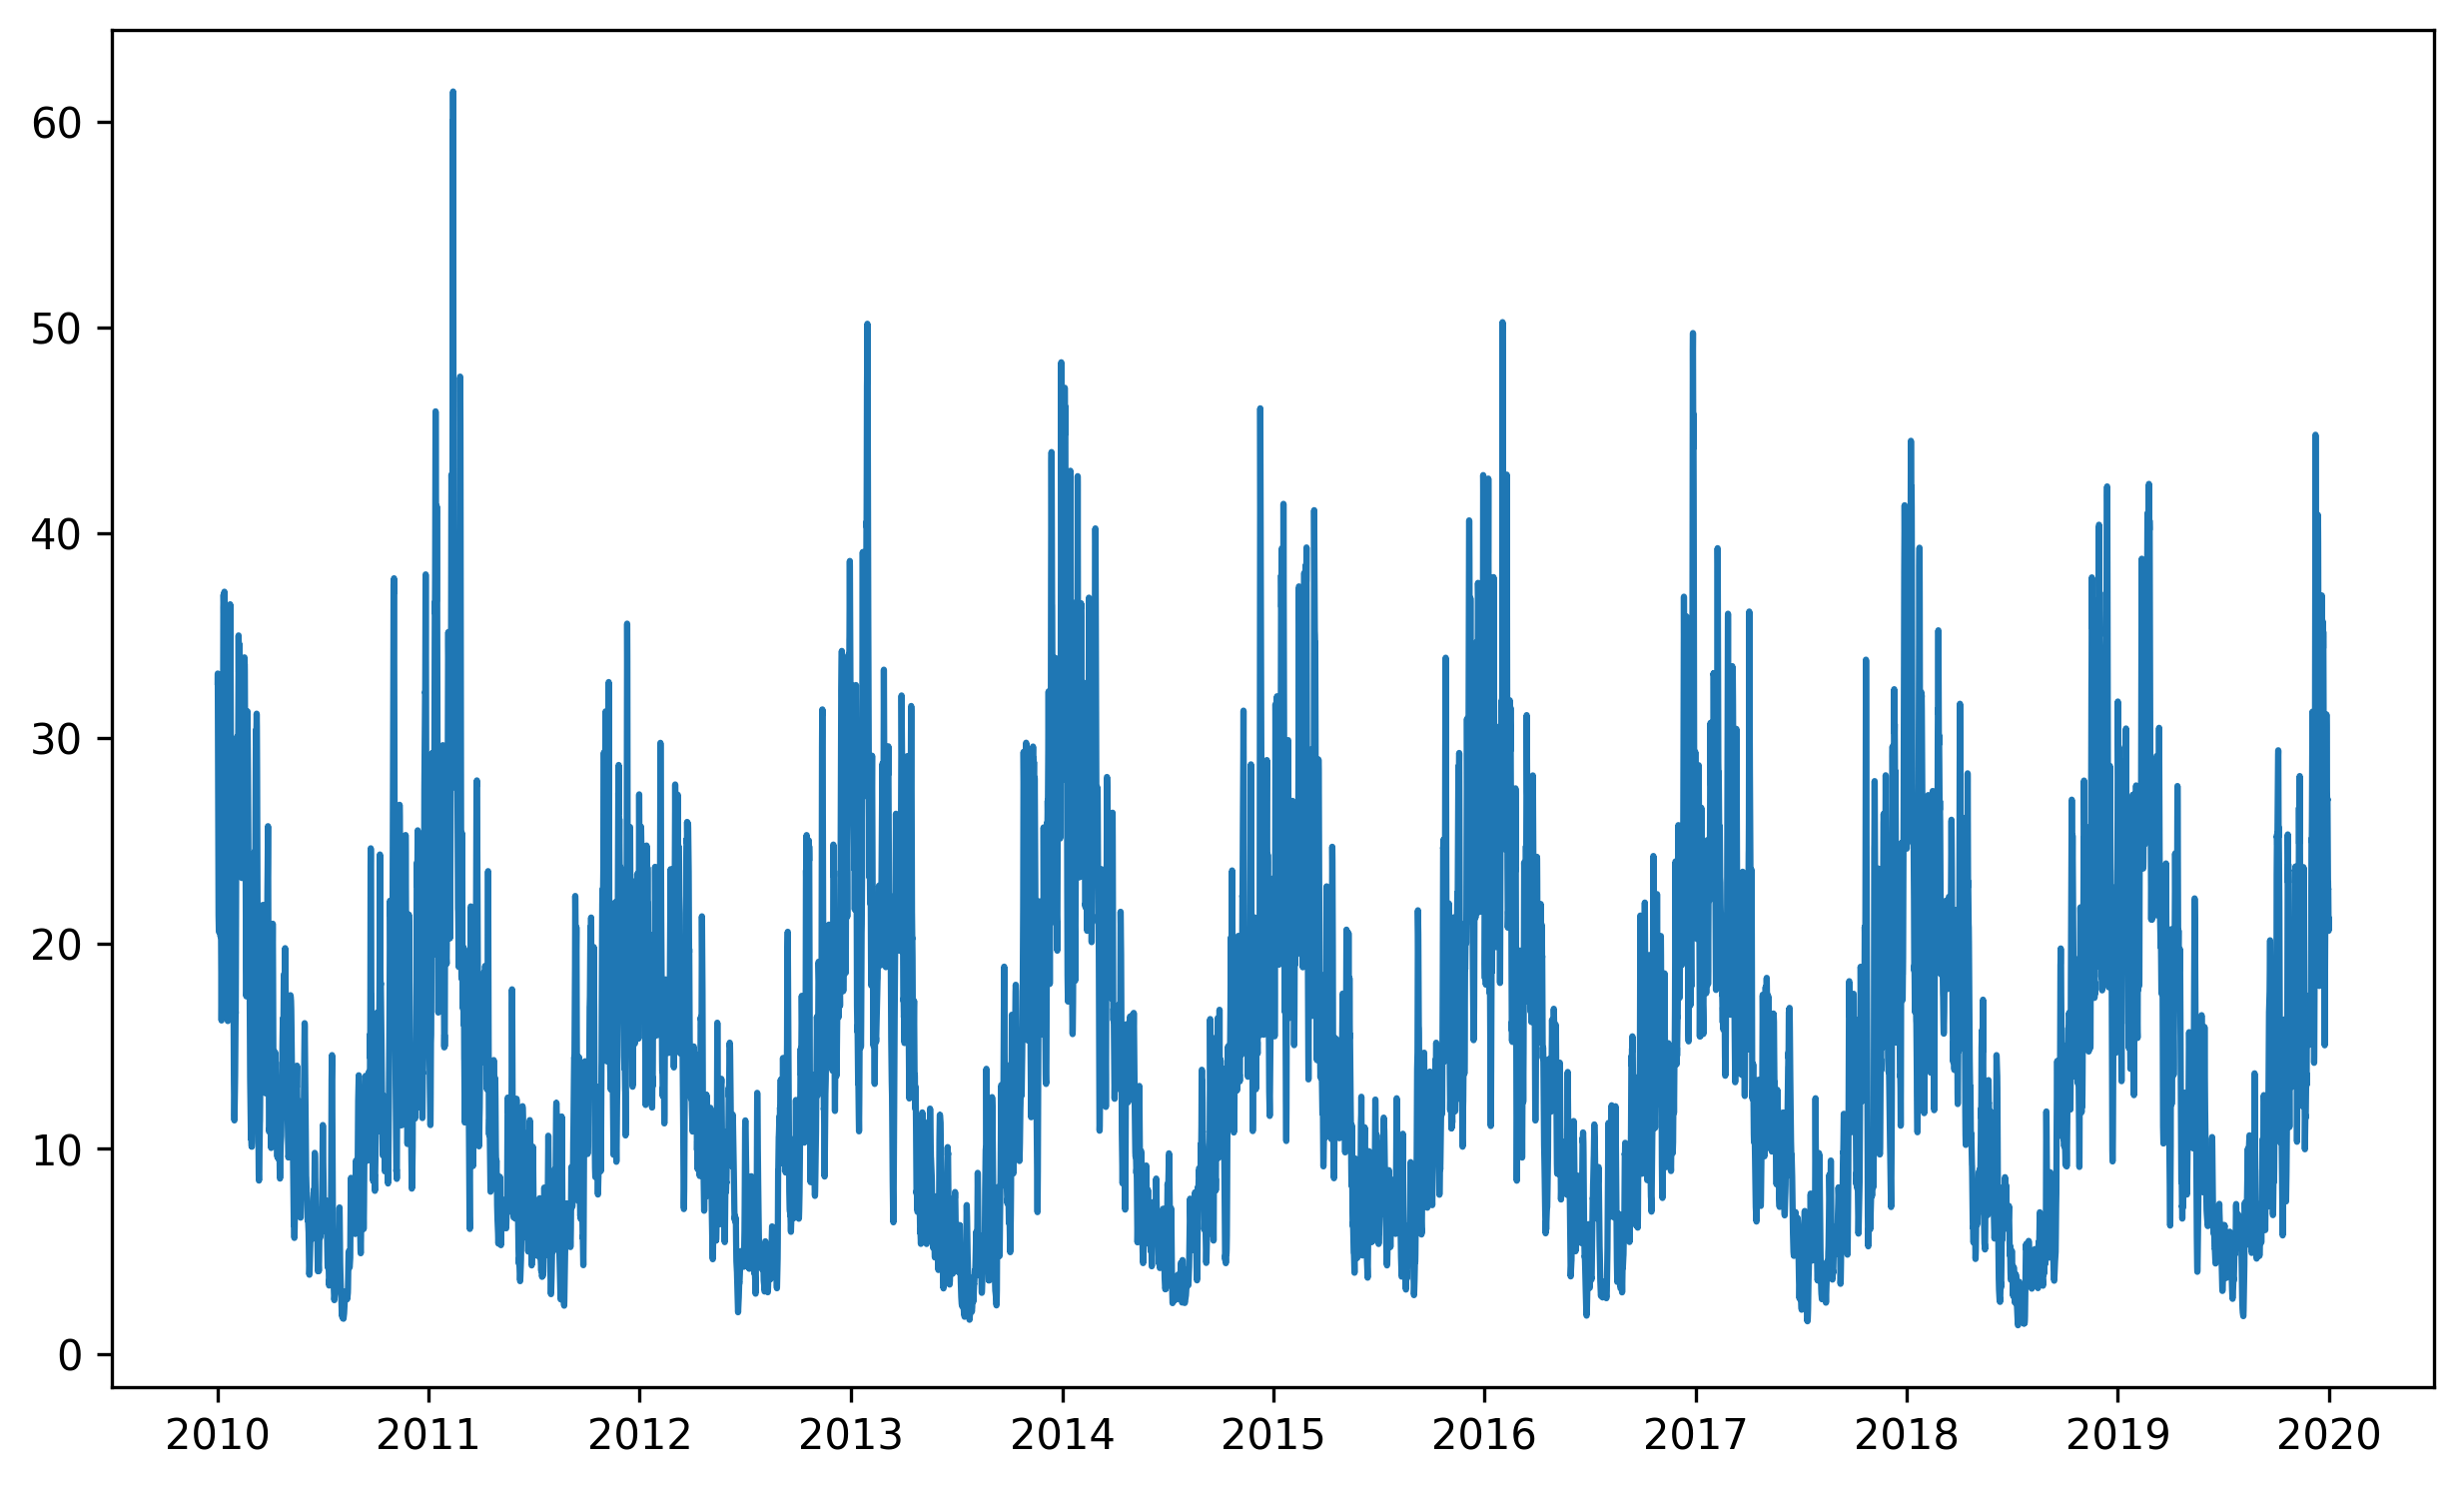

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(dates_ocean_pwr,ocean_pwr_na)
#plt.plot(dates_ocean_pwr,ocean_pwr_sa)

In [8]:
dates_ocean_pwr

array([[datetime.datetime(2010, 1, 1, 0, 0)],
       [datetime.datetime(2010, 1, 1, 3, 0)],
       [datetime.datetime(2010, 1, 1, 6, 0)],
       ...,
       [datetime.datetime(2019, 12, 31, 15, 0)],
       [datetime.datetime(2019, 12, 31, 18, 0)],
       [datetime.datetime(2019, 12, 31, 21, 0)]], dtype=object)

In [17]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# URL of the website
url = "https://cdip.ucsd.edu/themes/cdip?d2=p70&pb=1&u2=s:179:st:1:v=min_max_mean:max_frq:0.33:dt:202406"

# Request the page content
response = requests.get(url)
response.raise_for_status()  # Ensure the request was successful
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table
table = soup.find('table')
if table is None:
    raise ValueError("No table found on the webpage")

# Extract table headers if available
headers = [th.text.strip() for th in table.find_all('th')]
if not headers:
    headers = ["Column1", "Column2"]  # Manually set headers if not found

print("Headers:", headers)  # Debugging print

# Extract table rows
rows = []
for tr in table.find_all('tr'):
    cells = [td.text.strip() for td in tr.find_all('td')]
    if cells:
        rows.append(cells)

print("Rows:", rows)  # Debugging print

# Create DataFrame
df = pd.DataFrame(rows, columns=headers)
print(df.head())

# If necessary, clean and process the DataFrame further

# Example plot (if Date and numerical values are present in the correct format)
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.apply(pd.to_numeric, errors='ignore')

    # Plotting
    plt.figure(figsize=(12, 6))
    for column in df.columns[1:]:
        plt.plot(df['Date'], df[column], label=column)
        
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title('CDIP Data')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Date column not found. Unable to plot time series data.")


Headers: ['Column1', 'Column2']
Rows: [['179 - ASTORIA CANYON, OR \n\t\t\t\t\t\t\t\t\t \xa0 Notice:03/05/2024 Deployed buoy', 'Mobile View']]
                                             Column1      Column2
0  179 - ASTORIA CANYON, OR \n\t\t\t\t\t\t\t\t\t ...  Mobile View
Date column not found. Unable to plot time series data.
